O trabalho 2 tem por objetivo estudar e estimar a curva de potência utilizando diferentes métodos, regressão polinomial, Algoritmo de Busca Global(GRS), Algoritmo de Busca Local(LRS) e um modelo de metaheuristica populacional, no caso da atividade abaixo, foi escolhido o PSO(Otimização Por Enxame de Partículas).

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ler o arquivo Excel
file_path = '/content/aerogerador.xls'
df = pd.read_excel(file_path)
df.columns = ['velocidade_vento','potencia']

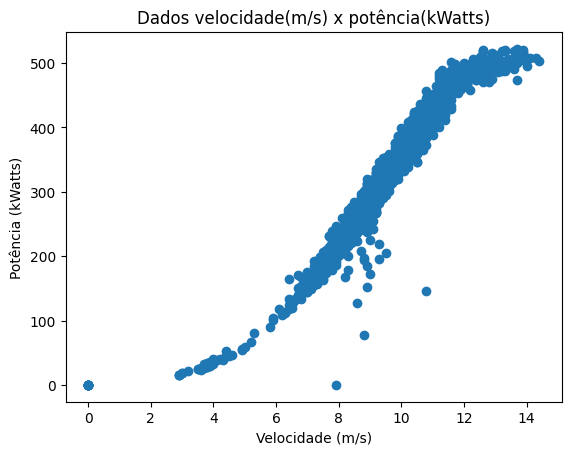

In [32]:
plt.scatter(x='velocidade_vento',y='potencia',data=df)
plt.title('Dados velocidade(m/s) x potência(kWatts)')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Potência (kWatts)')
plt.show()

Inicialmente foram inicializados os dados da base aerogerador que possui duas variáveis, potência(kW) e velocidade(m/s).

Acima é plotado o gráfico de dispersão das duas variáveis. Observando o gráfico é possivel notar que os dados apresentam uma característica não linear, assim podemos destacar que uma regressão linear simples e um modelo de regressão polinomial dupla não serão úteis no projeto em questão, pois não representariam bem a relação entre essas variáveis.

## Questão 1

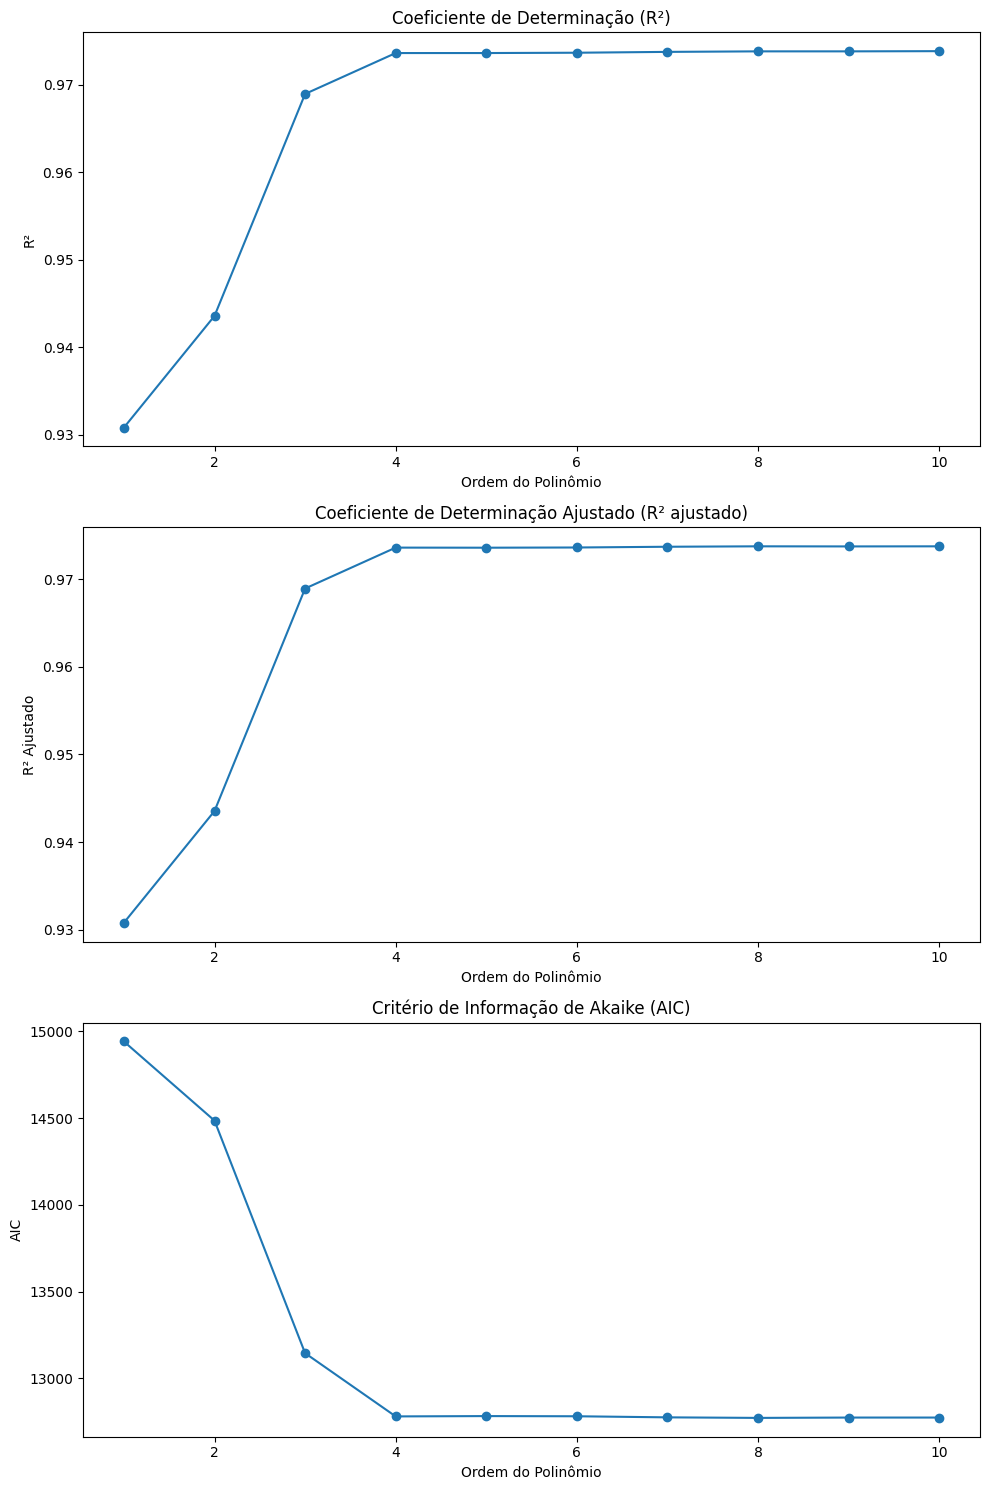

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de entrada: x (velocidade do vento) e y (potência)
x = df['velocidade_vento'].values  # Dados da velocidade do vento
y = df['potencia'].values  # Dados da potência
n = len(x)

# Inicializar vetores para armazenar os valores de cada critério
R2 = np.zeros(10)
R2_adj = np.zeros(10)
AIC = np.zeros(10)

# Variar a ordem do polinômio k de 1 a 10
for k in range(1, 11):
    # Ajustar um polinômio de ordem k
    p = np.polyfit(x, y, k)

    # Avaliar o polinômio ajustado nos pontos x
    y_fit = np.polyval(p, x)

    # Calcular a Soma dos Quadrados Totais (SST) e Soma dos Quadrados dos Resíduos (SSE)
    SST = np.sum((y - np.mean(y)) ** 2)
    SSE = np.sum((y - y_fit) ** 2)

    # Calcular R²
    R2[k - 1] = 1 - (SSE / SST)

    # Calcular R² ajustado
    R2_adj[k - 1] = 1 - ((SSE / (n - k - 1)) / (SST / (n - 1)))

    # Calcular o AIC
    AIC[k - 1] = n * np.log(SSE / n) + 2 * (k + 1)  # k+1 é o número de parâmetros no modelo

# Plotar os gráficos dos critérios em função da ordem do polinômio
plt.figure(figsize=(10, 15))

# Gráfico para R²
plt.subplot(3, 1, 1)
plt.plot(range(1, 11), R2, '-o')
plt.xlabel('Ordem do Polinômio')
plt.ylabel('R²')
plt.title('Coeficiente de Determinação (R²)')

# Gráfico para R² ajustado
plt.subplot(3, 1, 2)
plt.plot(range(1, 11), R2_adj, '-o')
plt.xlabel('Ordem do Polinômio')
plt.ylabel('R² Ajustado')
plt.title('Coeficiente de Determinação Ajustado (R² ajustado)')

# Gráfico para AIC
plt.subplot(3, 1, 3)
plt.plot(range(1, 11), AIC, '-o')
plt.xlabel('Ordem do Polinômio')
plt.ylabel('AIC')
plt.title('Critério de Informação de Akaike (AIC)')

plt.tight_layout()
plt.show()


Assim como solicitado na questão, foi realizada uma iteração com K valores, sendo esse K variando de 1 a 10 para cada iteração. Esse valor de K representa o grau do polinomio a ser verificado.

Assim como no matlab, foi utilizada a função polyfit para estimar os coeficientes de regressão polinomial e também foram aplicados os metodos de medida de adequação do modelo, R², R² ajustado e AIC(Critério de informação de Akaike).

Observando os gráficos gerados, todos os três critérios de avaliação apresentaram como resultado o polinômio de ordem 4.

Apesar dos polinômios de ordem maiores também poderem ser usados, os mesmos podem gerar sobreajuste do modelo.

In [29]:
# Ajustar um polinômio de ordem 4 e mostrar os coeficientes
k = 4  # Ordem do polinômio
p = np.polyfit(x, y, k)

# Exibir os coeficientes do polinômio
print("Coeficientes do polinômio de ordem 4:", p)

Coeficientes do polinômio de ordem 4: [-0.06767791  1.43418936 -5.00739868 10.39343066 -0.42973469]


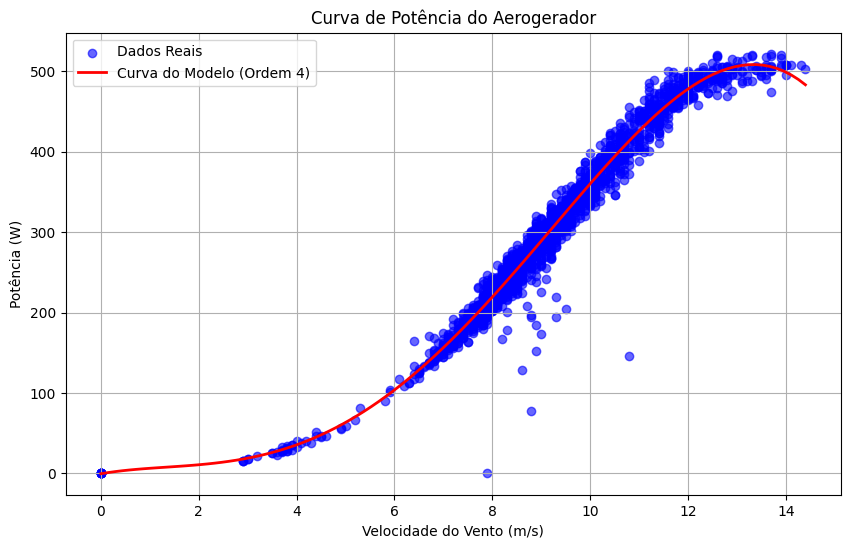

In [30]:
# Plotar o scatter plot e a curva do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados Reais', alpha=0.6)

# Gerar valores de x para a curva do modelo
x_fit = np.linspace(min(x), max(x), 100)  # 100 pontos entre o mínimo e máximo de x
y_fit = np.polyval(p, x_fit)  # Avaliar a curva do polinômio nos pontos de x_fit

# Plotar a curva do modelo
plt.plot(x_fit, y_fit, color='red', label='Curva do Modelo (Ordem 4)', linewidth=2)

# Configurar o gráfico
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência (W)')
plt.title('Curva de Potência do Aerogerador')
plt.legend()
plt.grid(True)
plt.show()

A figura acima projeta a curva do polinomio sobre os dados do aerogerador. Nota-se que a curva cria uma projeção satisfatória, podendo ser uma representação condizente dos dados.

## Questão 2 - Modelo GRS

A questão 2 solicita que utilize o mesmo k(ordem do polinômio) e aplique dois modelos heurísticos de busca para estimar a curva dos dados, os modelos GRS e LRS, usar como função objetivo a soma dos erros quadráticos.

O objetivo da questão é gerar as 3 melhores curvas de convergência para cada modelo, verificar se os coeficientes gerados pelos 2 modelos são semelhantes ao gerado na questão 1 e dizer se o resultado final é sempre o mesmo a cada busca do sistema.

Melhores coeficientes (ordem k): [-0.03781648  0.65518747  1.23124802 -4.34383098  4.11634551]
Soma dos Erros Quadráticos (SEQ): 778609.9186457795


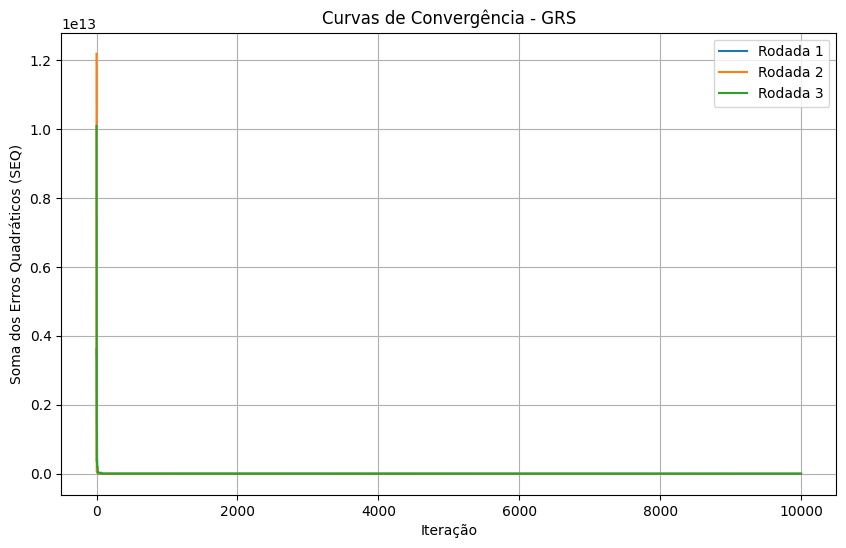

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # Importar pandas para manipulação de DataFrames

# Função objetivo (Soma dos Erros Quadráticos)
def func_objetivo(coeffs, v, p):
    predictions = np.polyval(coeffs, v)
    errors = p - predictions
    return np.sum(errors**2)

# Parâmetros do GRS
Ng = 10000  # Número de iterações
k = 4  # Ordem do polinômio
M = 100  # Número de rodadas independentes

# Dados de entrada: x (velocidade do vento) e y (potência)
x = df['velocidade_vento'].values  # Dados da velocidade do vento
y = df['potencia'].values  # Dados da potência

melhores_aptidoes = []

# Executar M rodadas de GRS
for _ in range(M):
    x_best = np.random.uniform(-10, 10, size=(k + 1))  # Solução inicial aleatória
    Fbest = func_objetivo(x_best, x, y)  # Avalia solução inicial
    aptidao = [Fbest]

    for t in range(Ng):
        x_cand = np.random.uniform(-5, 5, size=(k + 1))  # Solução candidata
        Fcand = func_objetivo(x_cand, x, y)  # Avalia solução candidata

        if Fcand < Fbest:  # Se a solução candidata é melhor
            x_best = x_cand  # Atualiza a melhor solução
            Fbest = Fcand

        aptidao.append(Fbest)  # Armazena a melhor aptidão

    melhores_aptidoes.append((Fbest, x_best, aptidao))  # Armazena a última aptidão, coeficientes e a série completa

# Ordenar as rodadas pela aptidão final
melhores_aptidoes.sort(key=lambda x: x[0])  # Classificar pela soma dos erros quadráticos

# Print dos coeficientes do melhor caso
melhor_case = melhores_aptidoes[0]  # O melhor caso é o primeiro após a ordenação
print("Melhores coeficientes (ordem k):", melhor_case[1])
print("Soma dos Erros Quadráticos (SEQ):", melhor_case[0])

# Plotar as curvas de convergência das 3 melhores rodadas
plt.figure(figsize=(10, 6))
for i in range(min(3, len(melhores_aptidoes))):  # Limita a 3 melhores
    plt.plot(melhores_aptidoes[i][2], label=f'Rodada {i+1}')
plt.title('Curvas de Convergência - GRS')
plt.xlabel('Iteração')
plt.ylabel('Soma dos Erros Quadráticos (SEQ)')
plt.grid(True)
plt.legend()
plt.show()


O primeiro modelo a ser aplicado foi o GRS(Global Random Search). Modelo de busca que não deriva de formalismos matemáticos, isso faz com que o modelo não garanta o resultado ótimo, mas o subótimo.

O modelo gera uma solução inicial aleatória, em seguida verifica se ela é a que melhor minimiza a função de ativação, no caso da questão, a soma do erro quadrático, caso seja, ela fica armazenada como o valor ótimo, em seguida é gerada uma solução candidata uniforme que será comparada a melhor solução, caso ela seja melhor, ela substitui se tornando a melhor solução.

O método é iterativo e pode ser realizado até a convergência dos dados ou até realizar o ciclo de iteração definido no programa.

Durante o programa, alguns hiperparâmetros foram modificados para conseguir uma solução que possuí-se os estimadores mais próximos ao do modelo polinomial. Os valores mais modificados foram o número de iterações, o número de rodadas independentes e o intervalo do tipo caixa. Os outros hiperparâmetros foram modificados porém os que apresentaram melhores resultados foram os default.

Como o método gera valores aleatórios para as soluções, cada vez que o programa é rodado, os valores gerados são diferente.

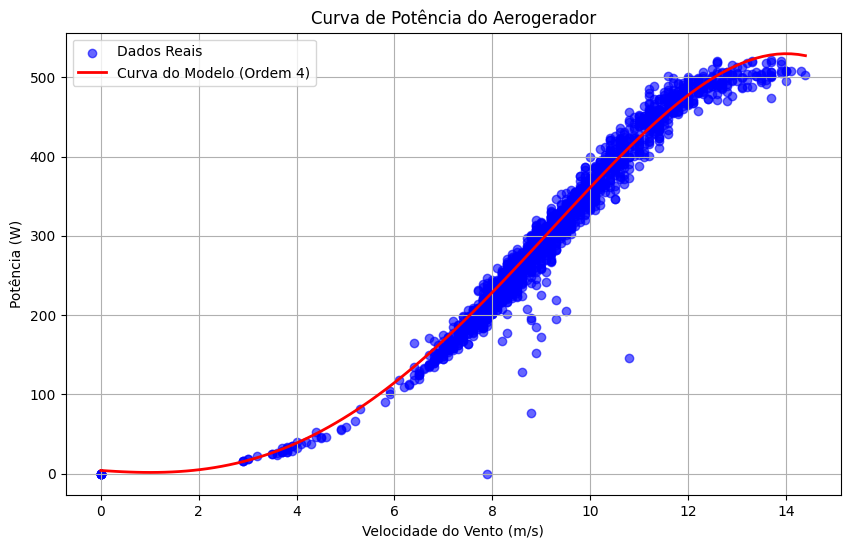

In [65]:
# Melhores coeficientes obtidos do GRS
p = melhor_case[1]  # Coeficientes do melhor polinômio encontrado (ordem k)

# Plotar o scatter plot e a curva do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados Reais', alpha=0.6)

# Gerar valores de x para a curva do modelo
x_fit = np.linspace(min(x), max(x), 100)  # 100 pontos entre o mínimo e máximo de x
y_fit = np.polyval(p, x_fit)  # Avaliar a curva do polinômio nos pontos de x_fit

# Plotar a curva do modelo
plt.plot(x_fit, y_fit, color='red', label='Curva do Modelo (Ordem 4)', linewidth=2)

# Configurar o gráfico
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência (W)')
plt.title('Curva de Potência do Aerogerador')
plt.legend()
plt.grid(True)
plt.show()


A figura acima apresenta a melhor curva gerada pelo modelo GRS.



## MODELO - LRS

Melhores coeficientes (ordem k): [-0.06746408  1.3722146  -3.63943382  2.94336055 -1.34922199]
Soma dos Erros Quadráticos (SEQ): 687172.7481407793


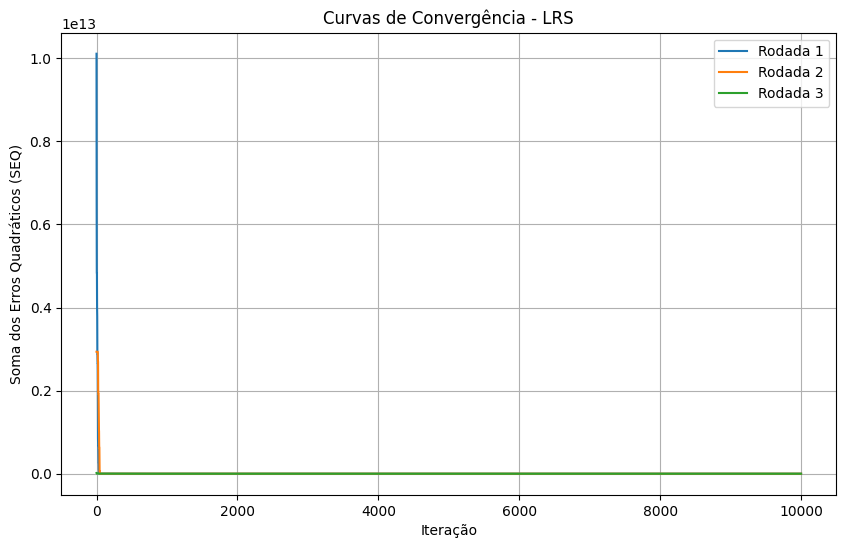

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função objetivo (Soma dos Erros Quadráticos)
def func_objetivo(coeffs, v, p):
    predictions = np.polyval(coeffs, v)
    errors = p - predictions
    return np.sum(errors**2)

# Parâmetros do LRS
Ng = 10000  # Número de iterações
k = 4  # Ordem do polinômio
M = 100  # Número de rodadas independentes
perturbacao = 0.5  # Tamanho da perturbação na vizinhança

# Dados de entrada: x (velocidade do vento) e y (potência)
x = df['velocidade_vento'].values  # Dados da velocidade do vento
y = df['potencia'].values  # Dados de potência

melhores_aptidoes = []

# Executar M rodadas de LRS
for _ in range(M):
    x_best = np.random.uniform(-10, 10, size=(k + 1))  # Solução inicial aleatória
    Fbest = func_objetivo(x_best, x, y)  # Avalia solução inicial
    aptidao = [Fbest]

    for t in range(Ng):
        # Gera uma solução candidata na vizinhança da solução atual
        x_cand = x_best + np.random.uniform(-perturbacao, perturbacao, size=(k + 1))
        # Garante que a solução candidata está dentro dos limites
        x_cand = np.clip(x_cand, -5, 5)  # Ajuste os limites conforme necessário

        Fcand = func_objetivo(x_cand, x, y)  # Avalia solução candidata

        if Fcand < Fbest:  # Se a solução candidata é melhor
            x_best = x_cand  # Atualiza a melhor solução
            Fbest = Fcand

        aptidao.append(Fbest)  # Armazena a melhor aptidão

    melhores_aptidoes.append((Fbest, x_best, aptidao))  # Armazena a última aptidão, coeficientes e a série completa

# Ordenar as rodadas pela aptidão final
melhores_aptidoes.sort(key=lambda x: x[0])  # Classificar pela soma dos erros quadráticos

# Print dos coeficientes do melhor caso
melhor_case = melhores_aptidoes[0]  # O melhor caso é o primeiro após a ordenação
print("Melhores coeficientes (ordem k):", melhor_case[1])
print("Soma dos Erros Quadráticos (SEQ):", melhor_case[0])

# Plotar as curvas de convergência das 3 melhores rodadas
plt.figure(figsize=(10, 6))
for i in range(min(3, len(melhores_aptidoes))):  # Limita a 3 melhores
    plt.plot(melhores_aptidoes[i][2], label=f'Rodada {i+1}')
plt.title('Curvas de Convergência - LRS')
plt.xlabel('Iteração')
plt.ylabel('Soma dos Erros Quadráticos (SEQ)')
plt.grid(True)
plt.legend()
plt.show()


Assim como o modelo GRS, o LRS também segue o mesmo princípio de encontrar a melhor solução que minimize a função de ativação buscando pela solução candidata gerada aleatoriamente, porém diferente do GRS, o modelo LRS cria uma nova solução candidata próxima a melhor solução sendo gerada por uma perturbação.



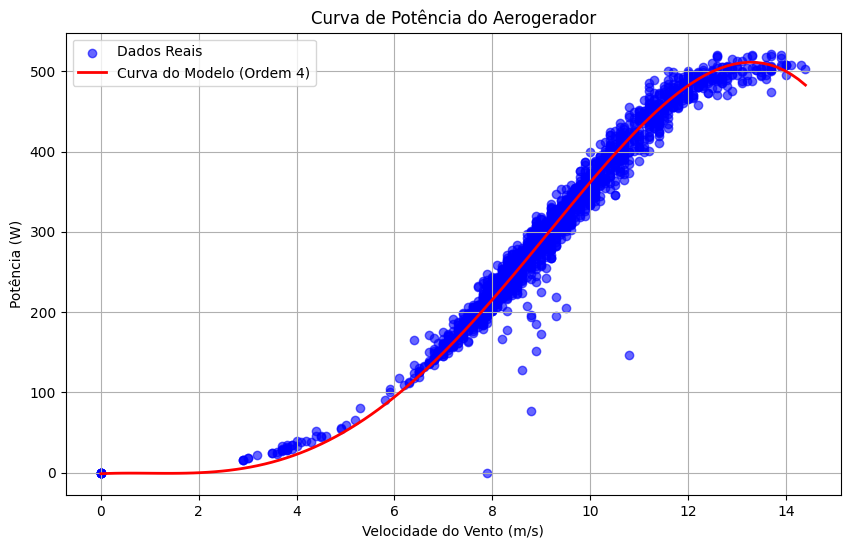

In [67]:
# Melhores coeficientes obtidos do LRS
p = melhor_case[1]  # Coeficientes do melhor polinômio encontrado (ordem k)

# Plotar o scatter plot e a curva do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados Reais', alpha=0.6)

# Gerar valores de x para a curva do modelo
x_fit = np.linspace(min(x), max(x), 100)  # 100 pontos entre o mínimo e máximo de x
y_fit = np.polyval(p, x_fit)  # Avaliar a curva do polinômio nos pontos de x_fit

# Plotar a curva do modelo
plt.plot(x_fit, y_fit, color='red', label='Curva do Modelo (Ordem 4)', linewidth=2)

# Configurar o gráfico
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência (W)')
plt.title('Curva de Potência do Aerogerador')
plt.legend()
plt.grid(True)
plt.show()


Assim como no modelo GRS, foram realizadas diversas modificações nos hiperparâmetros do modelo para que se conseguisse chegar em um valor que tivesse alguma semelhança com o modelo polinomial.

Foram analisados o número de iterações, de rodadas independentes, o valor da perturbação e o valor caixa para a geração das soluções candidatas.Os outros hiperparâmetros foram modificados porém os que apresentaram melhores resultados foram os default.

A figura acima mostra a curva gerada pela função que apresentou os melhores coeficientes.

Em suma, os modelos não apresentaram valores dos coeficientes semelhantes ao modelo gerado na questão 1 e a cada rodada independete e a cada execução do programa os valores gerados são diferentes devido ao modelo estocástico das metaheurísticas aplicadas.

Observando as curvas de convergência, podemos notar que os modelos GRS e LRS convergem rapidamente para a melhor solução, porém a melhor solução não estava gerando os melhores coeficientes quando o número de iterações eram baixos.

## Questão 3

Melhores coeficientes (ordem k): [-0.05678731  1.09871026 -1.58579829 -1.71390796  4.96281858]
Soma dos Erros Quadráticos (SEQ): 660677.1918730183


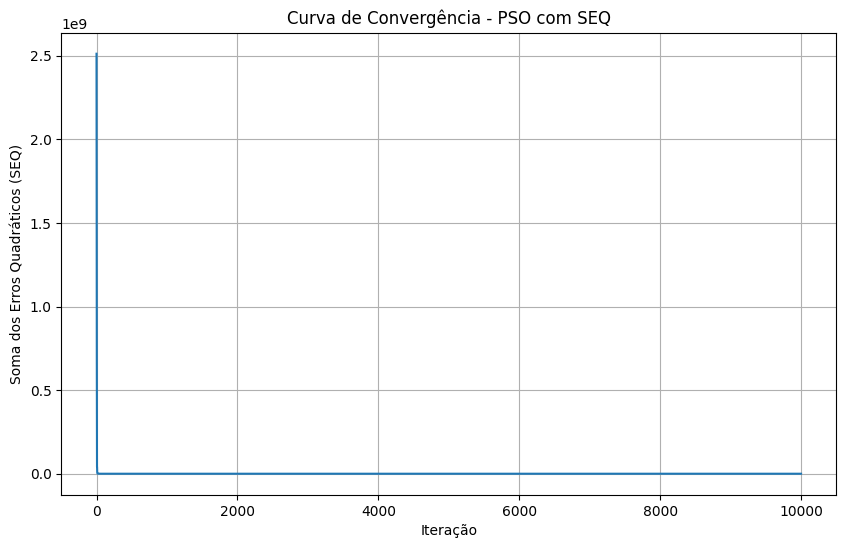

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Função objetivo (Soma dos Erros Quadráticos - SEQ)
def func_objetivo(coeffs, v, p):
    predictions = np.polyval(coeffs, v)
    errors = p - predictions
    return np.sum(errors**2)

# Parâmetros do PSO
num_particulas = 100
Ng = 10000  # Número de gerações/iterações
k = 4  # Ordem do polinômio
w = 0.5  # Inércia
c1 = 1.5  # Componente cognitiva
c2 = 1.5  # Componente social

# Dados de entrada: v (velocidade do vento) e p (potência)
x = df['velocidade_vento'].values  # Dados da velocidade do vento
y = df['potencia'].values  # Dados de potência correspondente

# Inicialização das partículas (soluções candidatas)
particulas = np.random.uniform(-10, 10, size=(num_particulas, k+1))  # k+1 coeficientes
velocidades = np.random.uniform(-1, 1, size=(num_particulas, k+1))

# Inicialização de melhores posições e aptidões
melhor_pos_pessoal = np.copy(particulas)
melhor_aptidao_pessoal = np.array([func_objetivo(p, x, y) for p in particulas])  # Correção: func_objetivo

# Melhor posição global e aptidão
indice_melhor_global = np.argmin(melhor_aptidao_pessoal)
melhor_pos_global = np.copy(melhor_pos_pessoal[indice_melhor_global])
melhor_aptidao_global = melhor_aptidao_pessoal[indice_melhor_global]

# Lista para armazenar a melhor aptidão em cada iteração
historico_aptidao = []

# Executar PSO
for t in range(Ng):
    for i in range(num_particulas):
        # Atualizar velocidade
        velocidades[i] = (w * velocidades[i] +
                          c1 * np.random.rand() * (melhor_pos_pessoal[i] - particulas[i]) +
                          c2 * np.random.rand() * (melhor_pos_global - particulas[i]))

        # Atualizar posição da partícula
        particulas[i] = particulas[i] + velocidades[i]

        # Avaliar a nova solução
        aptidao = func_objetivo(particulas[i], x, y)  # Correção: func_objetivo

        # Atualizar melhor posição pessoal
        if aptidao < melhor_aptidao_pessoal[i]:
            melhor_aptidao_pessoal[i] = aptidao
            melhor_pos_pessoal[i] = particulas[i]

    # Atualizar melhor posição global
    indice_melhor_global = np.argmin(melhor_aptidao_pessoal)
    if melhor_aptidao_pessoal[indice_melhor_global] < melhor_aptidao_global:
        melhor_aptidao_global = melhor_aptidao_pessoal[indice_melhor_global]
        melhor_pos_global = np.copy(melhor_pos_pessoal[indice_melhor_global])

    # Armazenar a melhor aptidão até o momento
    historico_aptidao.append(melhor_aptidao_global)

# Exibir os coeficientes ótimos e a aptidão final
print("Melhores coeficientes (ordem k):", melhor_pos_global)
print("Soma dos Erros Quadráticos (SEQ):", melhor_aptidao_global)
pso_seq = melhor_pos_global
# Plotar a curva de convergência
plt.figure(figsize=(10, 6))
plt.plot(historico_aptidao)
plt.title('Curva de Convergência - PSO com SEQ')
plt.xlabel('Iteração')
plt.ylabel('Soma dos Erros Quadráticos (SEQ)')
plt.grid(True)
plt.show()


A metaheuristica PSO se baseia no comportamento social dos animais.

O modelo inicializa a posição e a velocidade das partículas, encontra a solução com a melhor posição e velocidade e verifica a melhor posição dentro do enxame no qual está incluido.

O sistema fica iteragindo até encontrar a melhor solução para a velocidade e posição do enxame e sua melhor posição dentro do enxame.

Para encontrar um melhor modelo, foram modificados alguns valores dos hiperparâmetros, como o num_particulas, que é o número de soluções candidatas a explorar o espaço de soluções, o Ng, que é o número de iterações que o algoritmo executa. Os outros hiperparâmetros foram modificados porém os que apresentaram melhores resultados foram os default.

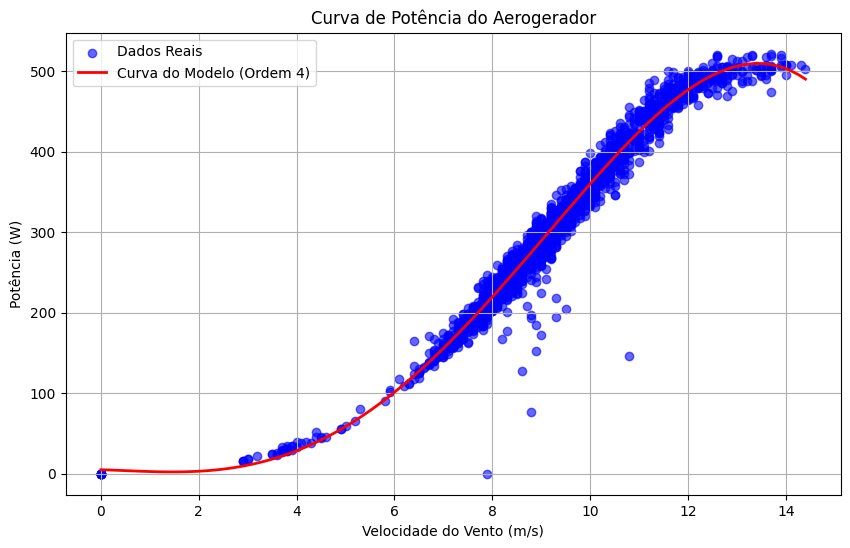

In [81]:
# Melhores coeficientes obtidos do PSO
p = pso_seq  # Coeficientes do melhor polinômio encontrado (ordem k)

# Plotar o scatter plot e a curva do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados Reais', alpha=0.6)

# Gerar valores de x para a curva do modelo
x_fit = np.linspace(min(x), max(x), 100)  # 100 pontos entre o mínimo e máximo de x
y_fit = np.polyval(p, x_fit)  # Avaliar a curva do polinômio nos pontos de x_fit

# Plotar a curva do modelo
plt.plot(x_fit, y_fit, color='red', label='Curva do Modelo (Ordem 4)', linewidth=2)

# Configurar o gráfico
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência (W)')
plt.title('Curva de Potência do Aerogerador')
plt.legend()
plt.grid(True)
plt.show()


Comparando os valores da metaheurística populacional com as GRS e LRS, não ocorreram uma diferença significativa que justifique o modelo PSO, seja em relação ao tempo de execução do programa, que foi semelhante, e a convergência do modelo, que tiveram valores aproximados e geraram coeficientes que podem satisfazer a curva característica dos dados.

Assim como os modelos GRS e LRS, o PSO também gera valores aleatórios de inicialização dos dados e das soluções candidatas, bem como dos hiperparâmetros, apresentando assim um comportamento estocástico.

## Questão 4

Melhores coeficientes (ordem k): [-0.06745118  1.39784546 -4.34508731  7.2301756   1.16471596]
Soma dos Erros Absolutos (SEA): 24069.050599631166


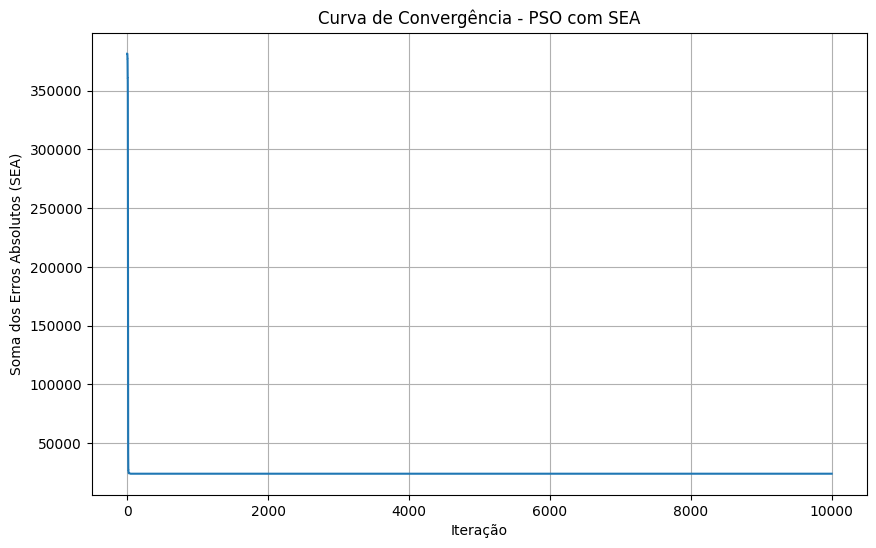

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Função objetivo modificada para SEA (Soma dos Erros Absolutos)
def func_objetivo_sea(coeffs, v, p):
    predictions = np.polyval(coeffs, v)
    errors = np.abs(p - predictions)  # Modificação para SEA
    return np.sum(errors)  # Soma dos erros absolutos

# Parâmetros do PSO
num_particulas = 100
Ng = 10000  # Número de gerações/iterações
k = 4  # Ordem do polinômio
w = 0.5  # Inércia
c1 = 1.5  # Componente cognitiva
c2 = 1.5  # Componente social

# Dados de entrada: v (velocidade do vento) e p (potência)
x = df['velocidade_vento'].values  # Dados da velocidade do vento
y = df['potencia'].values  # Dados de potência correspondente

# Inicialização das partículas (soluções candidatas)
particulas = np.random.uniform(-10, 10, size=(num_particulas, k+1))  # k+1 coeficientes
velocidades = np.random.uniform(-1, 1, size=(num_particulas, k+1))

# Inicialização de melhores posições e aptidões
melhor_pos_pessoal = np.copy(particulas)
melhor_aptidao_pessoal = np.array([func_objetivo_sea(p, x, y) for p in particulas])

# Melhor posição global e aptidão
indice_melhor_global = np.argmin(melhor_aptidao_pessoal)
melhor_pos_global = np.copy(melhor_pos_pessoal[indice_melhor_global])
melhor_aptidao_global = melhor_aptidao_pessoal[indice_melhor_global]

# Lista para armazenar a melhor aptidão em cada iteração
historico_aptidao = []

# Executar PSO
for t in range(Ng):
    for i in range(num_particulas):
        # Atualizar velocidade
        velocidades[i] = (w * velocidades[i] +
                          c1 * np.random.rand() * (melhor_pos_pessoal[i] - particulas[i]) +
                          c2 * np.random.rand() * (melhor_pos_global - particulas[i]))

        # Atualizar posição da partícula
        particulas[i] = particulas[i] + velocidades[i]

        # Avaliar a nova solução
        aptidao = func_objetivo_sea(particulas[i], x, y)

        # Atualizar melhor posição pessoal
        if aptidao < melhor_aptidao_pessoal[i]:
            melhor_aptidao_pessoal[i] = aptidao
            melhor_pos_pessoal[i] = particulas[i]

    # Atualizar melhor posição global
    indice_melhor_global = np.argmin(melhor_aptidao_pessoal)
    if melhor_aptidao_pessoal[indice_melhor_global] < melhor_aptidao_global:
        melhor_aptidao_global = melhor_aptidao_pessoal[indice_melhor_global]
        melhor_pos_global = np.copy(melhor_pos_pessoal[indice_melhor_global])

    # Armazenar a melhor aptidão até o momento
    historico_aptidao.append(melhor_aptidao_global)

# Exibir os coeficientes ótimos e a aptidão final
print("Melhores coeficientes (ordem k):", melhor_pos_global)
print("Soma dos Erros Absolutos (SEA):", melhor_aptidao_global)
pso_sea = melhor_pos_global
# Plotar a curva de convergência
plt.figure(figsize=(10, 6))
plt.plot(historico_aptidao)
plt.title('Curva de Convergência - PSO com SEA')
plt.xlabel('Iteração')
plt.ylabel('Soma dos Erros Absolutos (SEA)')
plt.grid(True)
plt.show()


Assim como todos os outros modelos, devido a sua natureza estocástica, os resultados apresentados foram diferentes de todos os outros, porém ao gerar a curva do polinomio com os coeficientes gerados pelo modelo, pode se observar que ela representa de forma significativa a curva dos dados.


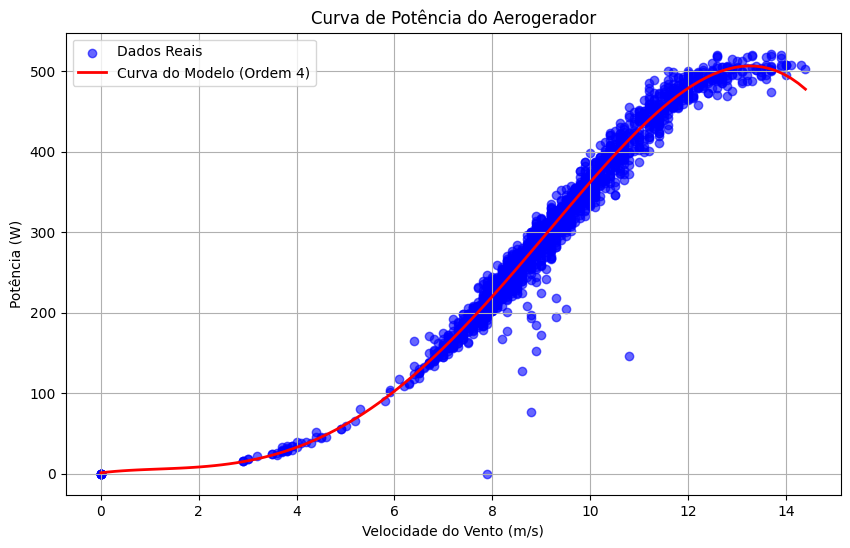

In [83]:
# Melhores coeficientes obtidos do PSO
p = pso_sea  # Coeficientes do melhor polinômio encontrado (ordem k)

# Plotar o scatter plot e a curva do modelo
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Dados Reais', alpha=0.6)

# Gerar valores de x para a curva do modelo
x_fit = np.linspace(min(x), max(x), 100)  # 100 pontos entre o mínimo e máximo de x
y_fit = np.polyval(p, x_fit)  # Avaliar a curva do polinômio nos pontos de x_fit

# Plotar a curva do modelo
plt.plot(x_fit, y_fit, color='red', label='Curva do Modelo (Ordem 4)', linewidth=2)

# Configurar o gráfico
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Potência (W)')
plt.title('Curva de Potência do Aerogerador')
plt.legend()
plt.grid(True)
plt.show()


Apesar de todos os modelos apresentarem coeficientes diferentes, as curvas geradas pelos modelos poilnomias se apresentaram semelhantes e podendo ser utilizada para a generalização do modelo.